# Music Recommendation System

## Project Description:

Spotify's recommendation system utilizes machine learning to predict a user's likelihood of repeatedly listening to a song within a specified timeframe. By analyzing a dataset where a value of `1` indicates repeated plays within a month, the system tracks user song histories and timestamps to generate personalized song recommendations. The goal is to enhance user experience by suggesting songs that are more likely to be enjoyed and replayed.

## Objectives:

- **Data Collection and Preprocessing:** Gather and prepare the dataset, including handling missing values and feature engineering.
- **Exploratory Data Analysis (EDA):** Analyze user listening patterns and song characteristics to understand the data structure.
- **Model Development:** Implement and train machine learning models to predict the likelihood of repeated plays, such as collaborative filtering or content-based approaches.
- **Model Evaluation:** Assess model performance using metrics like precision, recall, and F1-score to ensure accurate recommendations.
- **Personalized Recommendations:** Generate and evaluate personalized song recommendations based on user listening history and preferences.


### STEP 1: IMPORT LIBRARIES AND SETUP

In [13]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### STEP 2: LOAD DATA

In [14]:
data = pd.read_csv('data.csv')
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')
     

### STEP 3: DATA INSPECTION

In [15]:
data.info()

genre_data.info()

year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

### STEP 4: VISUALIZE FEATURE CORRELATION

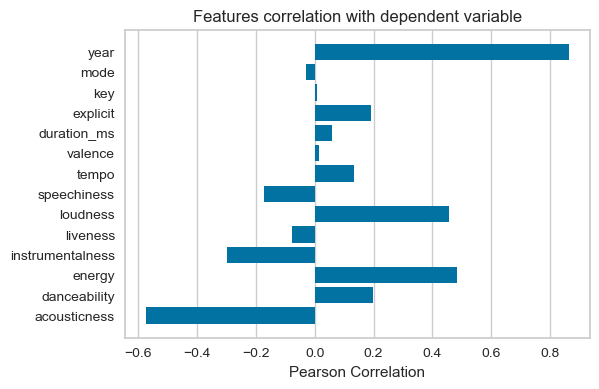

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [16]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']
x, y = data[feature_names], data['popularity']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)
plt.rcParams['figure.figsize']=(6,4)
visualizer.fit(x, y)
visualizer.show()

### STEP 5: VISUALIZE CORRELATION MATRIX HEATMAP

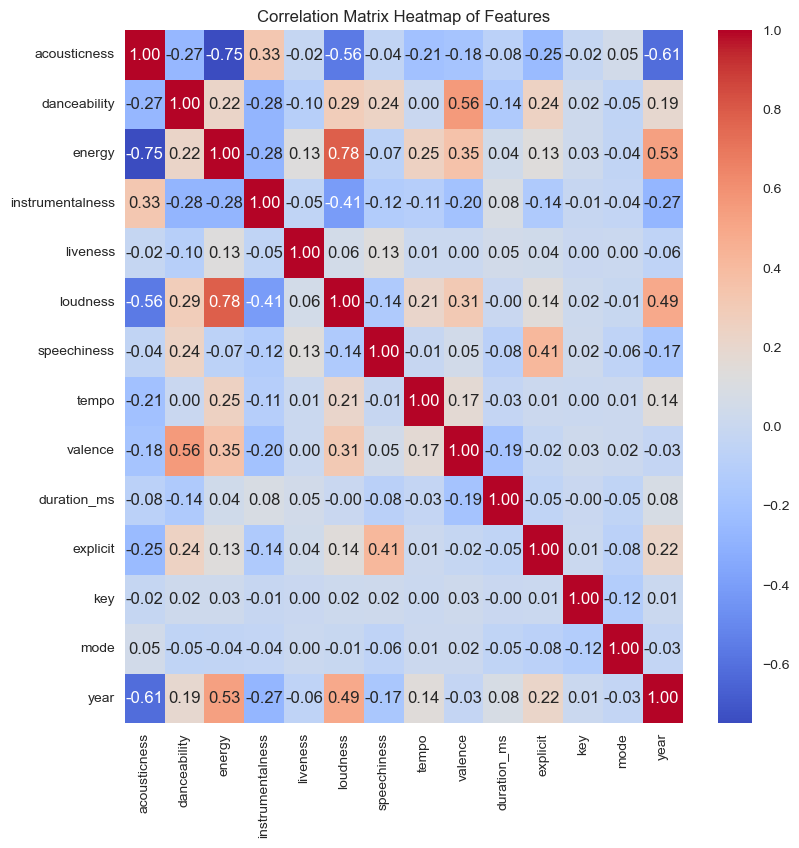

In [17]:

plt.figure(figsize=(9, 9))
sns.heatmap(data[feature_names].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Features')
plt.show()

### STEP 6: VISUALIZE SONGS COUNT PER DECADE

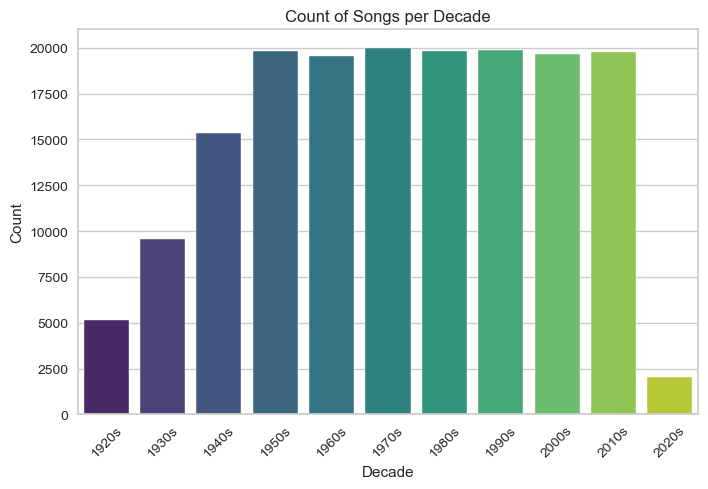

In [18]:
def get_decade(year):
    period_start = int(year / 10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='decade', palette='viridis')
plt.title('Count of Songs per Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### STEP 7: VISUALIZE DISTRIBUTION OF SONG POPULARITY

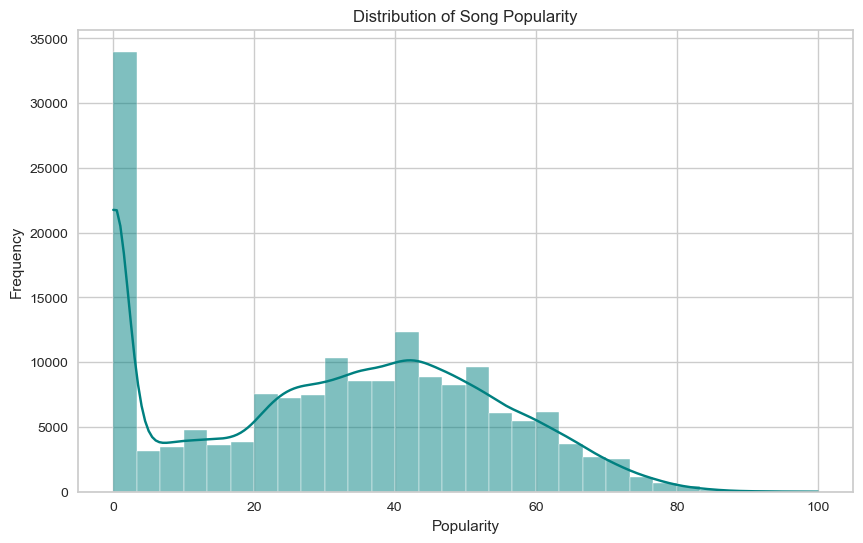

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=30, kde=True, color='teal')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


### STEP 8: VISUALIZE SOUND FEATURES OVER YEARS

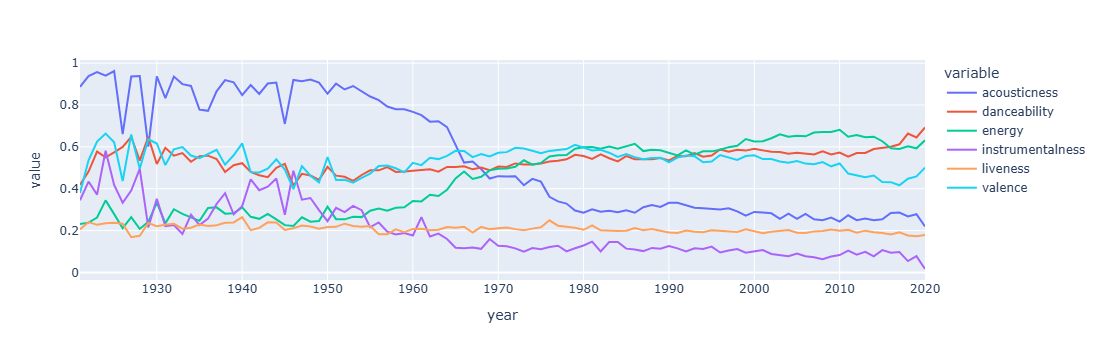

In [20]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

### STEP 9: VISUALIZE TOP 10 GENRES WITH SOUND FEATURES

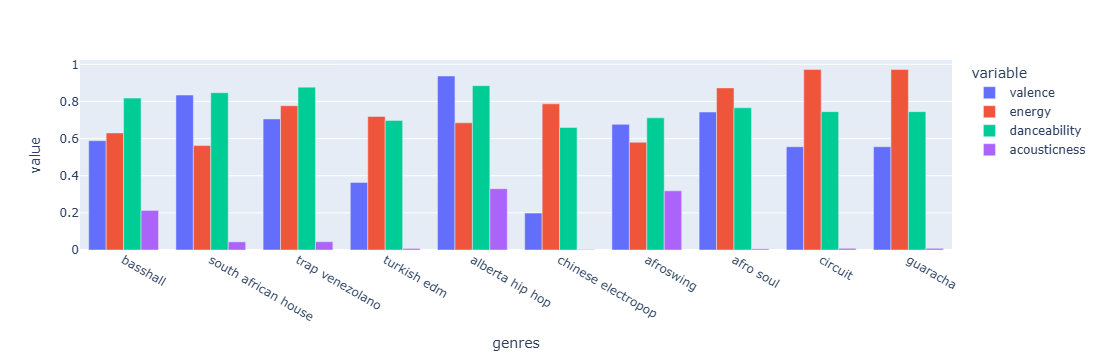

In [21]:
top10_genres = genre_data.nlargest(10, 'popularity')
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

### STEP 10: HEATMAP OF FEATURES IN RECOMMENDED SONGS

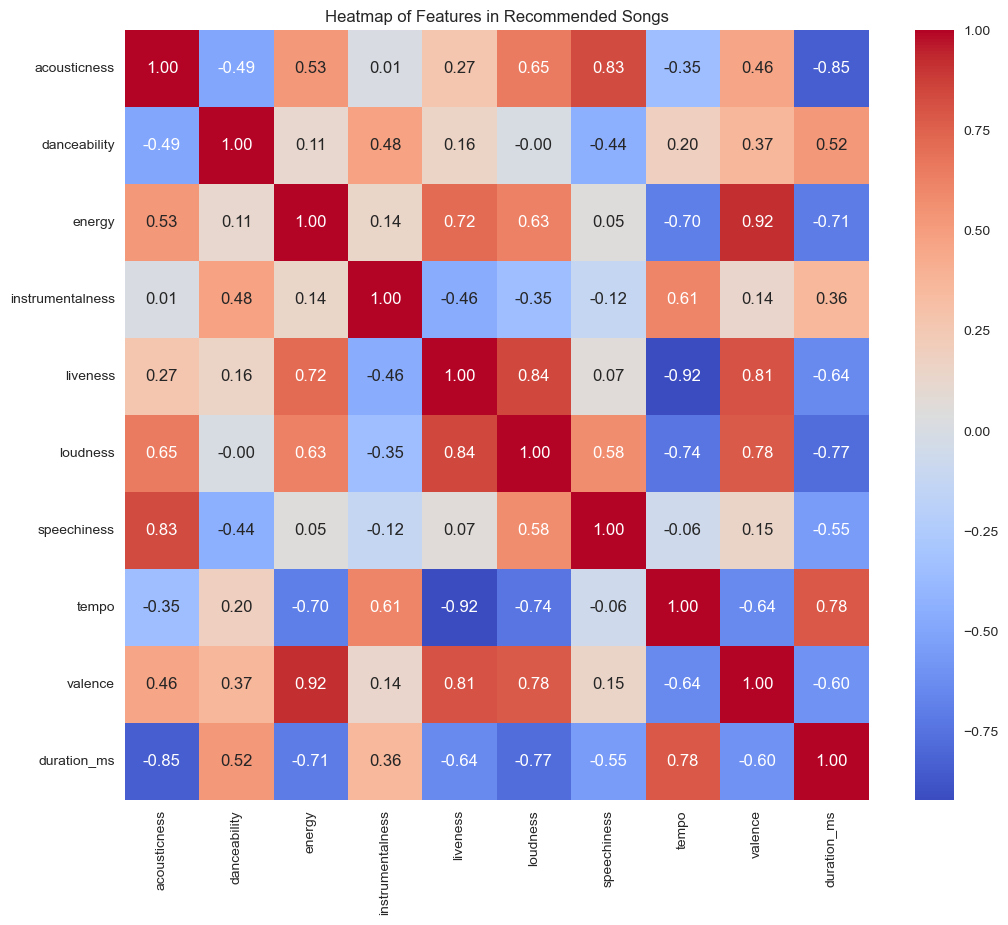

In [97]:
plt.figure(figsize=(12, 10))
sns.heatmap(recommendations_full[feature_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Features in Recommended Songs')
plt.show()


### STEP 11: CLUSTERING WITH K-MEANS:

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### STEP 12: DATA CONCATENATION

In [40]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms',
            'key', 'mode']

# Concatenating the datasets
X = pd.concat([data[features], genre_data[features], year_data[features]])

### STEP 13: K-MEANS CLUSTERING PIPELINE

In [42]:
# K-means clustering pipeline
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=10, random_state=42))
])

In [44]:
# Fit K-means clustering model
kmeans_pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=10, random_state=42))])

### STEP 14: ADDING CLUSTER LABELS TO THE DATASETS

In [47]:
# Adding cluster labels to the datasets
data['cluster_label'] = kmeans_pipeline.predict(data[features])
genre_data['cluster_label'] = kmeans_pipeline.predict(genre_data[features])
year_data['cluster_label'] = kmeans_pipeline.predict(year_data[features])

### STEP 15: SONG RECOMMENDATION FUNCTION

In [36]:
def recommend_songs(user_song, dataset):
    user_cluster = kmeans_pipeline.predict(user_song)[0]
    recommended_songs = dataset[dataset['cluster_label'] == user_cluster].sample(5)
    return recommended_songs[['name', 'artists']]
     

In [90]:
# Assuming 'recommendations' only has 'name' and 'artists', you need to merge it with the original dataset to get feature columns
full_data = data[['name', 'artists', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'explicit', 'key', 'mode', 'year', 'cluster_label']]

# Merge the recommendations DataFrame with the full_data DataFrame to get features
recommendations_full = pd.merge(recommendations, full_data, on=['name', 'artists'])

# Check the merged DataFrame to confirm it includes the numerical feature columns
print(recommendations_full.columns)


Index(['name', 'artists', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'duration_ms', 'explicit', 'key', 'mode', 'year',
       'cluster_label'],
      dtype='object')


In [32]:
# Example Usage
user_song = pd.DataFrame({
    'valence': [0.6], 'acousticness': [0.2], 'danceability': [0.7],
    'energy': [0.8], 'instrumentalness': [0.1], 'loudness': [-5],
    'speechiness': [0.3], 'tempo': [120], 'liveness': [0.5],
    'duration_ms': [250000], 'key': [0], 'mode': [1]
})
recommendations = recommend_songs(user_song[features], data)
print("Recommended Songs:")
recommendations

Recommended Songs:


name  \
136146                     I Wish I Could Have Been There   
30255                      Tonight the Bottle Let Me Down   
145450  Have You Ever Been Lonely (Have You Ever Been ...   
33031                                       Viéndolo Bien   
166557                               Borracho Te Recuerdo   

                      artists  
136146      ['John Anderson']  
30255     ['Waylon Jennings']  
145450        ['Buddy Holly']  
33031           ['Los Bukis']  
166557  ['Vicente Fernández']

### STEP 17: VISUALIZING TOP ARTISTS IN RECOMMENDATIONS

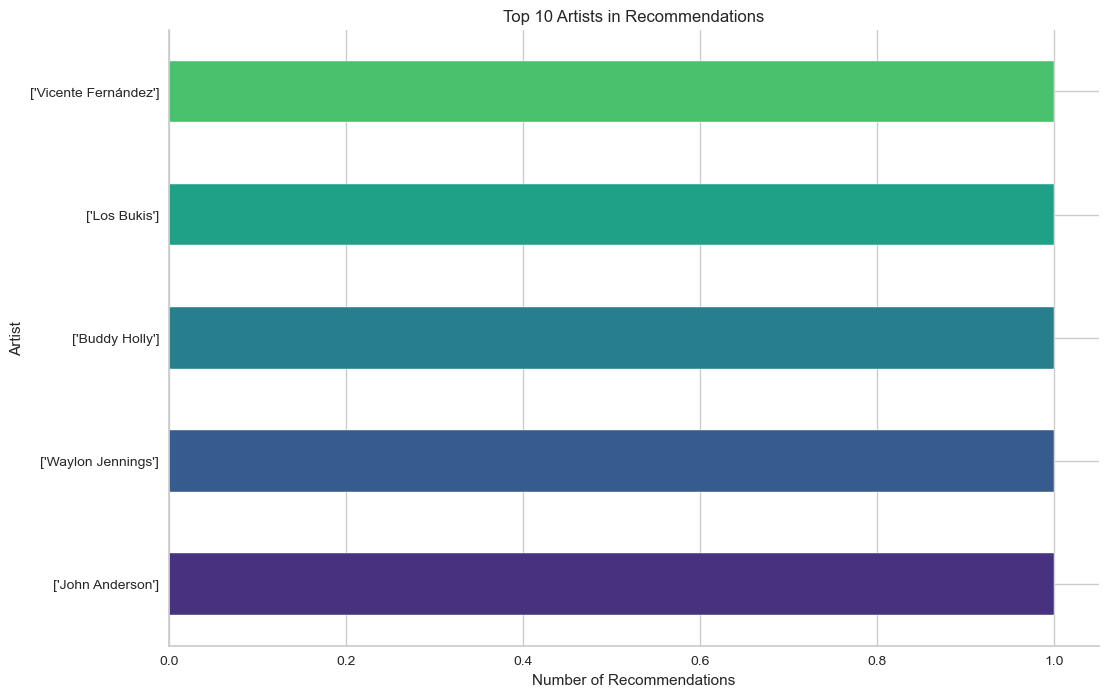

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
recommendations['artists'].explode().value_counts().head(10).plot(kind='barh', color=sns.color_palette('viridis'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Number of Recommendations')
plt.ylabel('Artist')
plt.title('Top 10 Artists in Recommendations')
plt.show()


### STEP 18: VISUALIZE TOP 10 RECOMMENDED SONGS

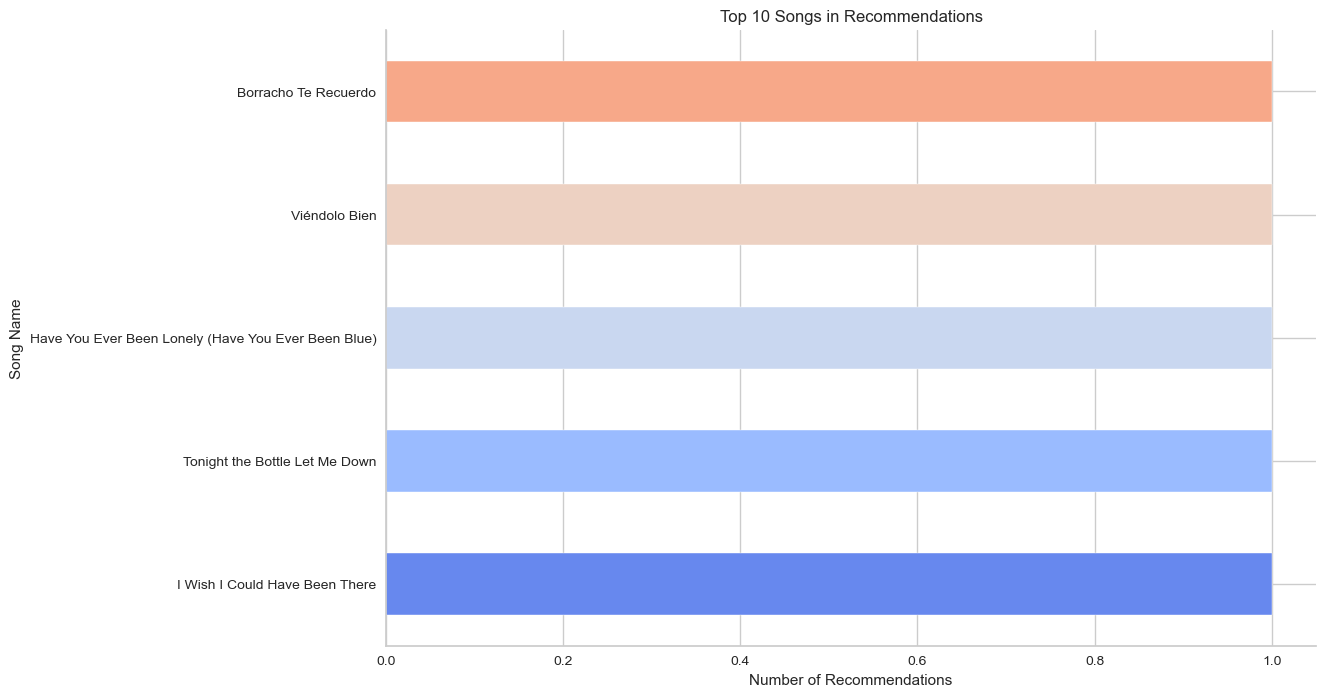

In [78]:
plt.figure(figsize=(12, 8))
recommendations['name'].value_counts().head(10).plot(kind='barh', color=sns.color_palette('coolwarm'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Number of Recommendations')
plt.ylabel('Song Name')
plt.title('Top 10 Songs in Recommendations')
plt.show()
